In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Loading Dataset
data = pd.read_csv(r"C:\Users\snpan\AppData\Local\Packages\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\LocalState\sessions\16D053752CAEC2EED6C41EB58FE181ADAB10CC0C\transfers\2026-02\Daily_Demand_Forecasting_Orders.csv")
print(data.head())

   Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                                   4           316.307       223.270   
1                                   5           128.633        96.042   
2                                   6            43.651        84.375   
3                                   2           171.297       127.667   
4                                   3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448          

In [5]:
# Handle missing values
data.fillna(method='ffill', inplace=True)


C:\Users\snpan\AppData\Local\Temp\ipykernel_25916\1277691653.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [7]:
data.shape

(60, 13)

In [9]:
# separating Feature set X and target Y 
X = data.iloc[:,0:12]
y = data.iloc[:,-1]

In [11]:
X.shape

(60, 12)

In [13]:
y.shape

(60,)

In [15]:
# inspecting feature types
data.dtypes

Week of the month (first week, second, third, fourth or fifth week      int64
Day of the week (Monday to Friday)                                      int64
Non-urgent order                                                      float64
Urgent order                                                          float64
Order type A                                                          float64
Order type B                                                          float64
Order type C                                                          float64
Fiscal sector orders                                                  float64
Orders from the traffic controller sector                               int64
Banking orders (1)                                                      int64
Banking orders (2)                                                      int64
Banking orders (3)                                                      int64
Target (Total orders)                                           

In [17]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler = sc.fit(X)
X= scaler.transform(X)


In [19]:
# Regression
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
# prediction on test set
y_pred = model.predict(X_test)

In [25]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 7.815970093361102e-14
MSE: 1.3530542246350794e-26
R2 Score: 1.0


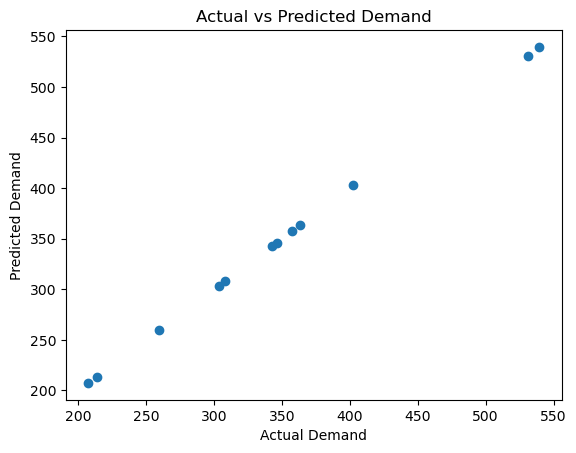

In [27]:
# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Demand")
plt.show()

In [29]:
# Classification
demand = pd.Series(y)


In [31]:
low_thr = demand.quantile(0.33)
high_thr = demand.quantile(0.66)
print (low_thr, high_thr)

247.66692 308.83788


In [33]:
labels = np.where(
    demand <= low_thr, 'L',
    np.where(demand <= high_thr, 'M', 'H')
)

In [35]:
demand= pd.DataFrame(labels)
demand.shape

(60, 1)

In [37]:
# train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, demand, test_size=0.2, random_state=42, stratify=demand
)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(Xtrain, ytrain)


DecisionTreeClassifier(random_state=42)

In [41]:
ypred = model.predict(Xtest)

In [43]:
print("Accuracy:", accuracy_score(ytest, ypred))
print("\nClassification Report:\n", classification_report(ytest, ypred))
print("\nConfusion Matrix:\n", confusion_matrix(ytest, ypred))


Accuracy: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

           H       1.00      1.00      1.00         4
           L       1.00      0.75      0.86         4
           M       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12


Confusion Matrix:
 [[4 0 0]
 [0 3 1]
 [0 0 4]]


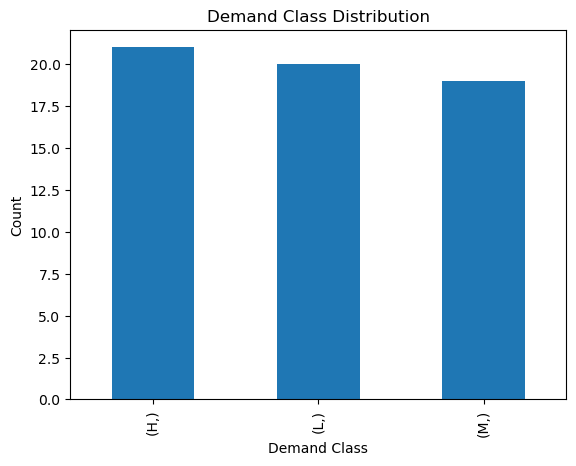

In [45]:
demand.value_counts().plot(kind='bar')
plt.xlabel("Demand Class")
plt.ylabel("Count")
plt.title("Demand Class Distribution")
plt.show()